In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import joblib

In [2]:
df = pd.read_csv('house_prices_tratado.csv')
df.head()

,Amount,Price,Bathroom,Balcony,Floor Number,Total Number
0,2500000.0,7583.8,1.0,1.0,1.0,3.0
1,4500000.0,6618.0,1.0,1.0,2.0,7.0
2,16500000.0,2538.0,1.0,2.0,4.0,5.0
3,6000000.0,10435.0,1.0,2.0,3.0,6.0
4,6000000.0,10000.0,1.0,2.0,3.0,6.0


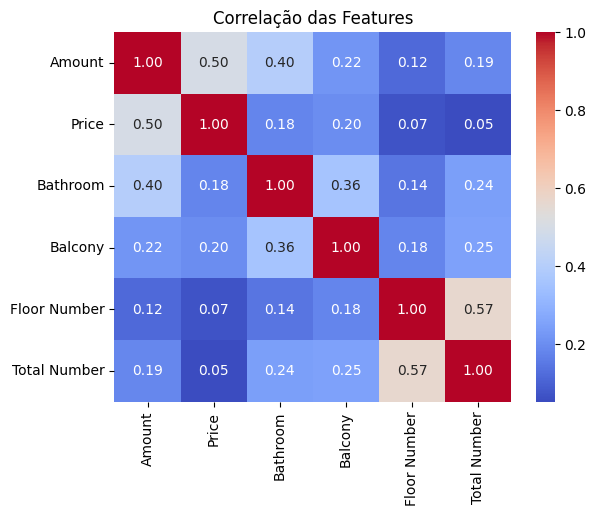

In [3]:
df_corr = df.corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação das Features')
plt.show()

In [4]:
X = df.drop('Price', axis=1)
y = df['Price']

In [5]:
def cruzamento_dados(X, y, test_size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  print('Cruzamento de dados concluído!')
  return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = cruzamento_dados(X, y, 0.2)

Cruzamento de dados concluído!


In [7]:
linear_model = LinearRegression()

In [19]:
def train_rating_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)

  r2 = r2_score(y_test, pred)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)

  print('-=' * 20)
  print(f'Modelo: {model}')
  print(f'R²: {r2:.4f}')
  print(f'MSE: {mse:.2f}')
  print(f'RMSE: {rmse:.2f}')
  print('-=' * 20)

  return model, r2, mse, rmse

In [20]:
train_rating_model(linear_model, X_train, X_test, y_train, y_test)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Modelo: LinearRegression()
R²: 0.2561
MSE: 5643894.87
RMSE: 2375.69
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


(LinearRegression(),
 0.2561017718160906,
 5643894.870352402,
 np.float64(2375.68829402184))

In [22]:
XGBoost_model = xgb.XGBRegressor()

In [23]:
train_rating_model(XGBoost_model, X_train, X_test, y_train, y_test)

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Modelo: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R²: 0.8744
MSE: 952875.86
RMSE: 976.15
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


(XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 0.874405409606955,
 952875.8607125961,
 np.float64(976.1536050809812))

In [25]:
r2_train = r2_score(y_train, XGBoost_model.predict(X_train))
r2_test = r2_score(y_test, XGBoost_model.predict(X_test))

print(f"R² no treino: {r2_train:.4f}")
print(f"R² no teste: {r2_test:.4f}")

R² no treino: 0.8947
R² no teste: 0.8744


**Isso indica que não há overfitting, ou seja, o modelo não está decorando, e sim aprendendo!**

In [28]:
joblib.dump(XGBoost_model, 'XGBoost_model_prediction.pkl')

['XGBoost_model_prediction.pkl']